## 1. Building machine learning networks and data augmentation of data.

In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
import matplotlib.pyplot as plt

# Define equipment for training定义训练的设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Store the average loss and precision for each epoch存储每个epoch的平均损失和精度
train_losses = []
train_accuracies = []
test_accuracies = []

# Data Enhancement数据增强
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # Random Horizontal Flip随机水平翻转
    transforms.RandomRotation(10),     # random rotation随机旋转
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Preparing the dataset准备数据集
train_data = torchvision.datasets.CIFAR10(root="./data", train=True, transform=train_transform, download=True)
test_data = torchvision.datasets.CIFAR10(root="./data", train=False, transform=test_transform, download=True)

# Data Loader数据加载器
train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=128, shuffle=False)

# Creating Network Models创建网络模型
class Lese(nn.Module):
    def __init__(self):
        super(Lese, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, 10)
        )

    def forward(self, x):
        x = self.model(x)
        return x

lese = Lese().to(device)

# loss function损失函数
loss_fn = nn.CrossEntropyLoss()
# optimiser优化器
optimizer = torch.optim.Adam(lese.parameters(), lr=0.001)
# Learning rate decay学习率衰减
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

100%|██████████| 170498071/170498071 [00:06<00:00, 26199437.30it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## 2. Construct training and testing loops and store data related to the training and testing process.

In [2]:
# Training and testing
epochs = 30
for epoch in range(epochs):
    lese.train()
    running_loss = 0.0
    running_correct = 0
    for batch_idx, (imgs, targets) in enumerate(train_dataloader):
        imgs, targets = imgs.to(device), targets.to(device)
        outputs = lese(imgs)
        loss = loss_fn(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == targets).sum().item()

    # Training accuracy per epoch
    train_accuracy = running_correct / len(train_data)

    # 画图
    train_losses.append(running_loss / len(train_dataloader))
    train_accuracies.append(running_correct / float(len(train_data)))

    # testing phase
    lese.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for imgs, targets in test_dataloader:
            imgs, targets = imgs.to(device), targets.to(device)
            outputs = lese(imgs)
            loss = loss_fn(outputs, targets)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == targets).sum().item()

    # Test accuracy per epoch
    test_accuracy = correct / len(test_data)

    # 画图
    test_accuracies.append(correct / float(len(test_data)))

    # Updated learning rate
    scheduler.step()

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {running_loss/len(train_dataloader):.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

Epoch 1/30, Train Loss: 1.4713, Train Accuracy: 0.4711, Test Accuracy: 0.5183
Epoch 2/30, Train Loss: 1.0580, Train Accuracy: 0.6217, Test Accuracy: 0.6761
Epoch 3/30, Train Loss: 0.9076, Train Accuracy: 0.6793, Test Accuracy: 0.7078
Epoch 4/30, Train Loss: 0.8206, Train Accuracy: 0.7122, Test Accuracy: 0.7096
Epoch 5/30, Train Loss: 0.7600, Train Accuracy: 0.7334, Test Accuracy: 0.7233
Epoch 6/30, Train Loss: 0.6227, Train Accuracy: 0.7832, Test Accuracy: 0.7983
Epoch 7/30, Train Loss: 0.5888, Train Accuracy: 0.7951, Test Accuracy: 0.7970
Epoch 8/30, Train Loss: 0.5669, Train Accuracy: 0.8032, Test Accuracy: 0.8089
Epoch 9/30, Train Loss: 0.5525, Train Accuracy: 0.8078, Test Accuracy: 0.8071
Epoch 10/30, Train Loss: 0.5430, Train Accuracy: 0.8102, Test Accuracy: 0.8107
Epoch 11/30, Train Loss: 0.5194, Train Accuracy: 0.8192, Test Accuracy: 0.8138
Epoch 12/30, Train Loss: 0.5189, Train Accuracy: 0.8189, Test Accuracy: 0.8148
Epoch 13/30, Train Loss: 0.5152, Train Accuracy: 0.8201, Test

## 3. Using matplotlib to plot relevant graphs

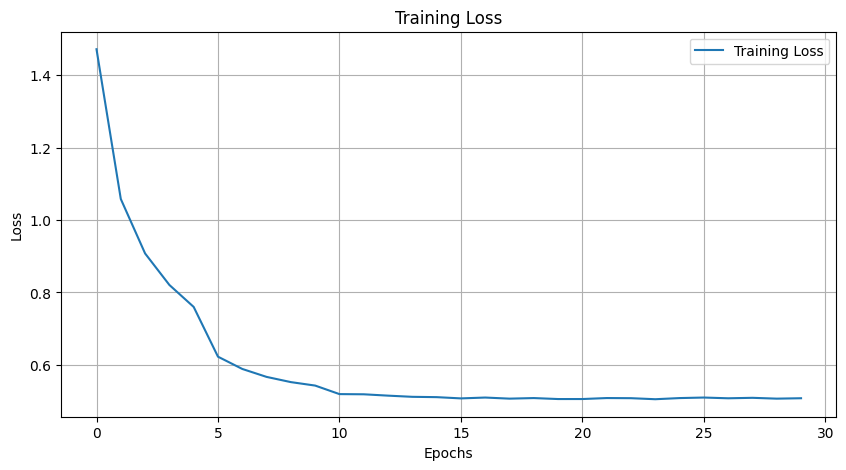

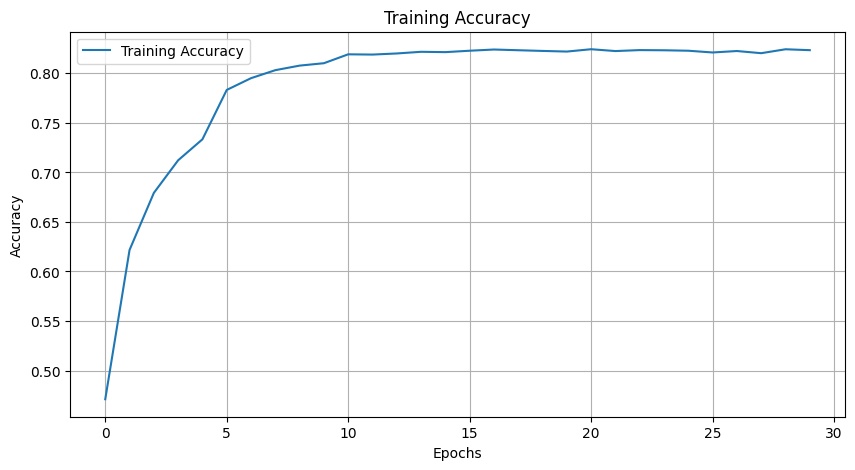

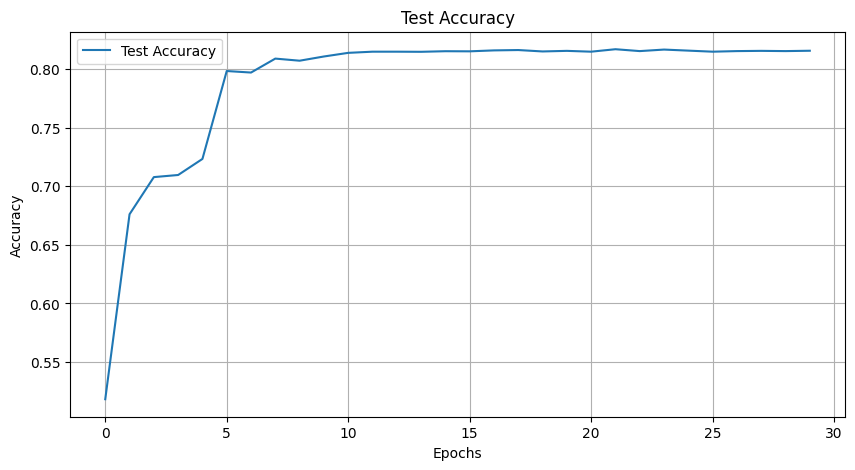

In [6]:
# Mapping training losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('Training_Loss.png')
plt.show()

# Plotting training accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('Training_Accuracy.png')
plt.show()

# Plotting test accuracy
plt.figure(figsize=(10, 5))
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('Test_Accuracy.png')
plt.show()
